In [1]:
using CorrelationFunctions
using CorrelationTrackers
using MaterialReconstruction
using ValueNoise
using Images

┌ Info: Precompiling MaterialReconstruction [03cb9323-3c4b-4e23-a84c-921ade87b3a3]
└ @ Base loading.jl:1317


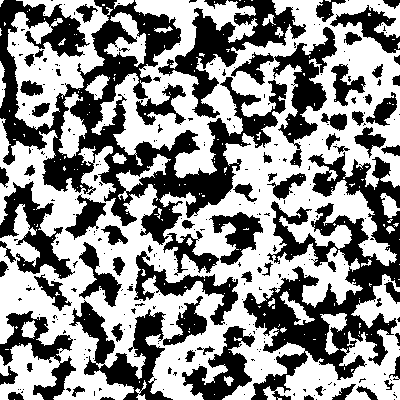

In [2]:
# Create a binary array (b/w image) using value noise
array = Int8.([value_noise(x/10, y/10, 0.0, 6, 3644) for x in 1:400, y in 1:400] .< 0.5)
# CorrelationTracker calculates two-point and lineal-path correlation functions along two axial
# and two diagonal directions.
target = CorrelationTracker{Int8, 2}(array; directions = [:x, :y, :xy_main, :xy_anti])
Gray.(target)

In [5]:
# System is another array initially filled with random data
system = initialize_random(target, (400, 400))
# Create a Furnace object, passing a random system, a target system and initial temperature.
furnace = MaterialReconstruction.Furnace(system, target; T0 = 0.00008)

Furnace with system of dimensions (400, 400), T=8.0e-5 steps=0, rejected=0, accepted=0

In [6]:
# Create a cost function which we will try to minimize during annealing
cost = euclid_directional_weighted(furnace)

# Repeat annealing steps in a loop
@time for i in 1:1000000
    furnace = annealing_step(furnace; cost = cost)
    if rem(i, 10000) == 0
        println(furnace)
        println("cost = $(MaterialReconstruction.sumcost(furnace.system, furnace.target, cost))")
        flush(stdout)
    end
end

Furnace with system of dimensions (400, 400), T=7.23869572491808e-5 steps=10000, rejected=2153, accepted=3178
cost = 2.900948286829733
Furnace with system of dimensions (400, 400), T=6.549839474743415e-5 steps=20000, rejected=4211, accepted=6606
cost = 2.8396209265224153
Furnace with system of dimensions (400, 400), T=5.926536875590623e-5 steps=30000, rejected=6389, accepted=9934
cost = 2.7820939254549852
Furnace with system of dimensions (400, 400), T=5.3625496431134064e-5 steps=40000, rejected=8581, accepted=13338
cost = 2.734691516877227
Furnace with system of dimensions (400, 400), T=4.85223314703324e-5 steps=50000, rejected=10969, accepted=16657
cost = 2.690013603335922
Furnace with system of dimensions (400, 400), T=4.390479917216921e-5 steps=60000, rejected=13552, accepted=19882
cost = 2.6483175774341206
Furnace with system of dimensions (400, 400), T=3.9726685258870676e-5 steps=70000, rejected=16353, accepted=22927
cost = 2.603972789324185
Furnace with system of dimensions (400

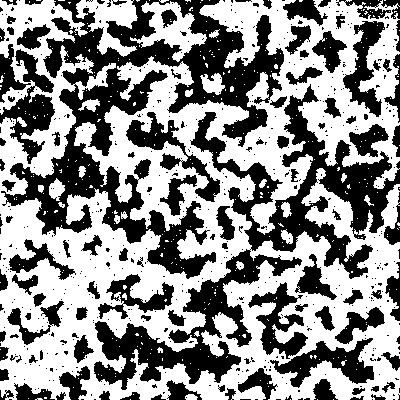

In [7]:
# Here is the result
Gray.(system)